<a href="https://colab.research.google.com/github/jittinabraham/Image-classification-cats-and-Dogs/blob/main/cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Model
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow import keras
from tensorflow.keras import Model
# setting up google drive
import platform
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
# set the correct root dir (precreate on google drive)
root_dir = 'gdrive/MyDrive/cats&Dogs/set_small/'


Mounted at /content/gdrive


In [2]:


conv_base = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False  # Do not include the ImageNet classifier at the top.
)

# Print structure in console
conv_base.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
print('This is the number of trainable weights '
'before freezing the conv base:',)
model.summary()

This is the number of trainable weights before freezing the conv base:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Freeze the conv base: set switch to freeze
conv_base.trainable = False
# Output to compare
print('This is the number of trainable weights '
'after freezing the conv base:')
model.summary()


This is the number of trainable weights after freezing the conv base:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
# load modules needed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set directories for training, validation and test set, here google ...
drive
base_dir = 'gdrive/MyDrive/cats&Dogs/set_small/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
# Set up constructor for data augmentation
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
# Test set only normalized, not augmented
test_datagen = ImageDataGenerator(rescale=1./255)
# Collect the images and do the augmentation, labels are set to binary
# augment training data
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
# augment validation data
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
if TRANSFER:
  print('Using Transfer learning...')
  # parameters for model training
  model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate=2e-5),
  metrics=['acc'])
  # do the training
  history = model.fit(
  train_generator,
  # steps_per_epoch=100, # no longer needed
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50) # could be taken out to improve speed
elif FINETUNE:
  print('Finetuning the model...')
  # set the parameters, here only freeze blocks 1 to 4
  # The loop freezes all layers UP TO a specific one
  conv_base.trainable = True
  set_trainable = False
for layer in conv_base.layers:
  # Replace according to your architecture...
  if layer.name == 'block5_conv1':
    # (e.g. DenseNet169: 'conv5_block26_1_conv')
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
    # compile the model with given parameters
    model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    metrics=['acc'])
    # Fine tune the model and start training
    history = model.fit(
    train_generator,
    # steps_per_epoch=100, # no longer needed
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
    # Fallback if something wents wrong
else:
  print('No freeze model, no other model')
  # save the trained model
  save_dir = os.path.join(root_dir, 'cats_dogs_net.h5')
  model.save(save_dir)

Using Transfer learning...
Epoch 1/30
100/100 [==============================] - 28s 269ms/step - loss: 0.2844 - acc: 0.8775 - val_loss: 0.2422 - val_acc: 0.9080
Epoch 2/30
100/100 [==============================] - 27s 271ms/step - loss: 0.2733 - acc: 0.8855 - val_loss: 0.2449 - val_acc: 0.8970
Epoch 3/30
100/100 [==============================] - 29s 288ms/step - loss: 0.2779 - acc: 0.8780 - val_loss: 0.2645 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 27s 270ms/step - loss: 0.2721 - acc: 0.8850 - val_loss: 0.2434 - val_acc: 0.9020
Epoch 5/30
100/100 [==============================] - 27s 268ms/step - loss: 0.2831 - acc: 0.8810 - val_loss: 0.2456 - val_acc: 0.9020
Epoch 6/30
100/100 [==============================] - 26s 265ms/step - loss: 0.2705 - acc: 0.8810 - val_loss: 0.2396 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 26s 262ms/step - loss: 0.2658 - acc: 0.8885 - val_loss: 0.2398 - val_acc: 0.9100
Epoch 8/30
100/100 [========

NameError: ignored

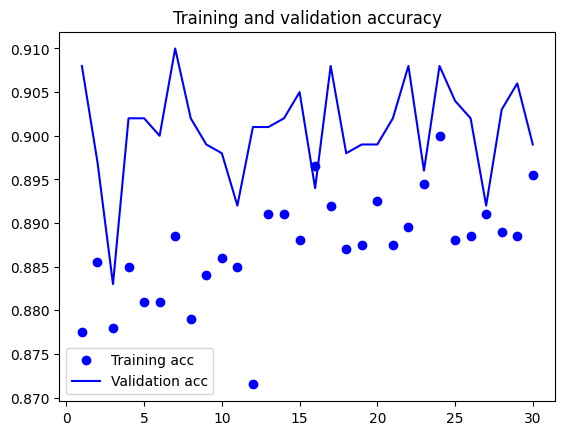

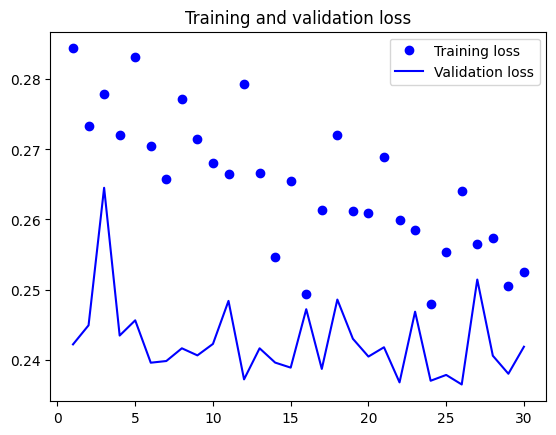

In [22]:
# get the recorded data for training and validation looking at ...
#accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# plot the curves
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
# test the accuraccy
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
# evaluate the test images with the model
test_loss, test_acc = model.evaluate(test_generator, steps=50)
# Output to console
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 85s 2s/step - loss: 0.2397 - acc: 0.9030
test acc: 0.902999997138977
